# This notebook comprises code used to numerically generate the conduit network system observed at Bear Spring based on inputs (sinkholes), outputs (springs), and topographical/geologic properties of the area


Importing of necessary pacakges. Ensure that pyKasso, Karstnet are installed as a part of the same directory path

### Warning: the packages skfmm and scipy have cross compatability issues with the most recent version of numpy. In order to ensure compatability between these two packages, use version 1.23.4 of numpy and version 1.9.2 of scipy. (as of 10/27/22)

In [1]:
#Load all packages needed for pyKasso, Skffm, karstnet, agd Remannian metric
import sys
import os
import copy
import numpy
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import mplstereonet #Needed for karstnet
import karstnet as kn #karst network statistisc
# there appears to be an issue with skfmm and the current versioning of numpy installed
sys.path.append(r'C:\Users\csouc\Desktop\Bear Spring Data\Bear_Spring_Modeling')
#fast marching related imports
import skfmm #fast marching algorithm, solves eikonal problems along boundary conditions
import agd #adaptive grid discritization, discretizing anisotropic PDE on cartesian grid
from agd import Eikonal
from agd.Metrics import Riemann
import importlib as importlib
import yaml
os.getcwd()

'C:\\Users\\csouc\\Desktop\\Bear Spring Data\\Bear_Spring_Modeling\\Bear_Spring_pyKasso'

In [2]:
#Import the base package from pyKasso
sys.path.append(r'C:\Users\csouc\Desktop\Bear Spring Data\Bear_Spring_Modeling\pyKasso-replace-fast-marching-with-HFM\pyKasso-replace-fast-marching-with-HFM\pykasso')
import base as pk

importlib.reload(pk);
os.getcwd()

'C:\\Users\\csouc\\Desktop\\Bear Spring Data\\Bear_Spring_Modeling\\Bear_Spring_pyKasso'

Import catchment input data for a simple system, aka topography, geology, spring locations, sinkhole locations. **No fracture data at this point, will likely generate randomly**

In [14]:
#created the SKS class for the springshed model
springshed = pk.SKS(r"C:\Users\csouc\Bear_Spring_pyKasso\inputs\bear\settings.yaml")

CAUTION: You are using the development version of this package.


Modify the settings.yaml file from within python to generate fractures, run conduit fast marching algorithm

In [ ]:
#modifications to fractures from image
#springshed.set_fractures_mode('random')
#springshed.set_fractures_densities([30,25])
#springshed.set_fractures_min_orientation([30,110])
#springshed.set_fractures_max_orientation([50,113])
#springshed.set_fractures_min_length(100)
#springshed.set_fractures_max_length(4000)
#springshed.update_fractures()



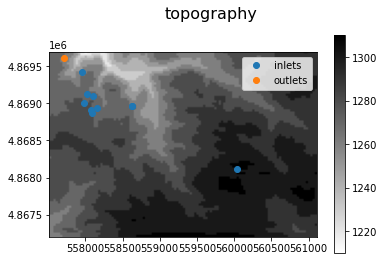

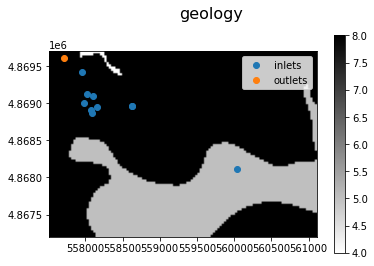

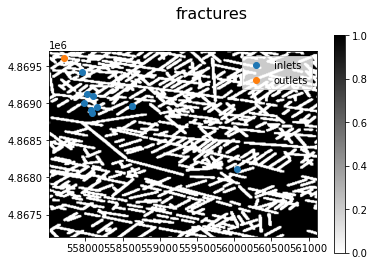

In [15]:
#display different aspects of the springshed model
topography = springshed.get_topography()
springshed.show_catchment(data='topography')
geology = springshed.get_geology()
springshed.show_catchment(data='geology')
fractures = springshed.get_fractures()
springshed.show_catchment(data='fractures')

In [ ]:
springshed.set_inlets_importance([1,2,2,5])
springshed.set_inlets_per_outlet([10])
springshed.set_outlets_importance([1])
springshed.set_outlets_number([1])
springshed.set_verbosity(3)
springshed.set_cost_aquifer(.3)
cost_aquifer = .3
springshed.set_cost_aquiclude(.4)
cost_aquiclude = .4
springshed.set_geology_id([4,5,8])
springshed.set_geology_cost([cost_aquiclude, cost_aquiclude, cost_aquifer])
#aquiclude isn't a true aquiclude, is instead a less soluble aquifer (stewartville) 
springshed.set_algorithm('Riemann2')
springshed.update_all()
springshed.compute_karst_network()
springshed.show()
springshed.show_network()